In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install jupyter

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import re
import cv2
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import re
import glob


In [6]:
# get file names of frames
col_frames = os.listdir('/home/swsmenon@ads.iu.edu/Downloads/content/drive/My Drive/Misc/road_detection/frames/')
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# load frames
col_images=[]
for i in tqdm(col_frames):
    img = cv2.imread('/home/swsmenon@ads.iu.edu/Downloads/content/drive/My Drive/Misc/road_detection/frames/'+i)
    col_images.append(img)

  0%|          | 0/1108 [00:00<?, ?it/s]

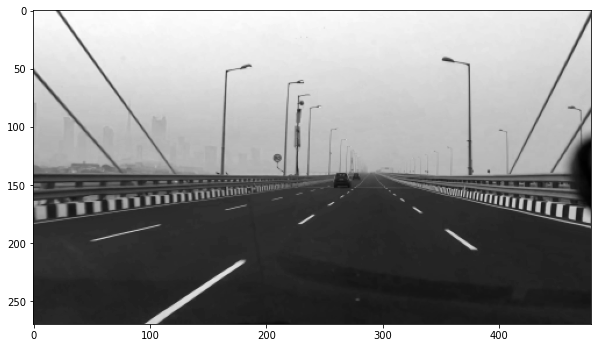

In [7]:
# specify frame index
idx = 457

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(col_images[idx][:,:,0], cmap= "gray")
plt.show()

In [8]:
# create a zero array
stencil = np.zeros_like(col_images[idx][:,:,0])

# specify coordinates of the polygon
polygon = np.array([[50,270], [220,160], [360,160], [480,270]])

# fill polygon with ones
cv2.fillConvexPoly(stencil, polygon, 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

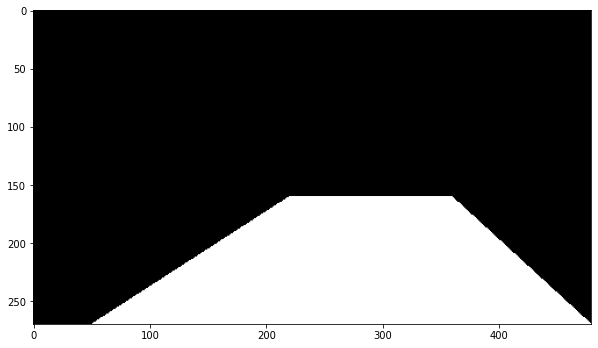

In [9]:
# plot polygon
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

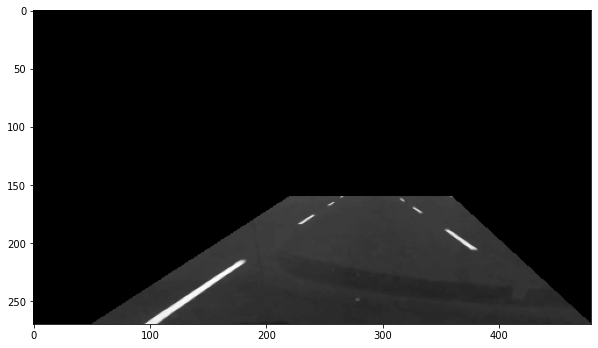

In [10]:
# apply polygon as a mask on the frame
img = cv2.bitwise_and(col_images[idx][:,:,0], col_images[idx][:,:,0], mask=stencil)

# plot masked frame
plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()

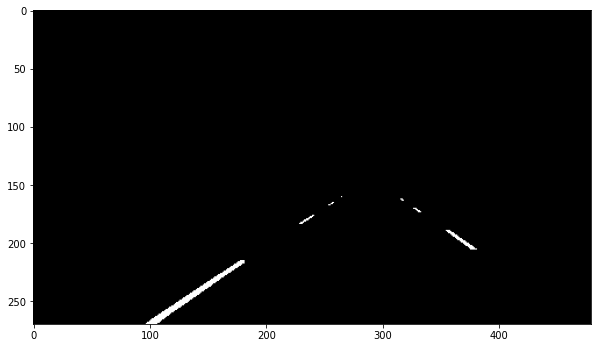

In [11]:
# apply image thresholding
ret, thresh = cv2.threshold(img, 130, 145, cv2.THRESH_BINARY)

# plot image
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

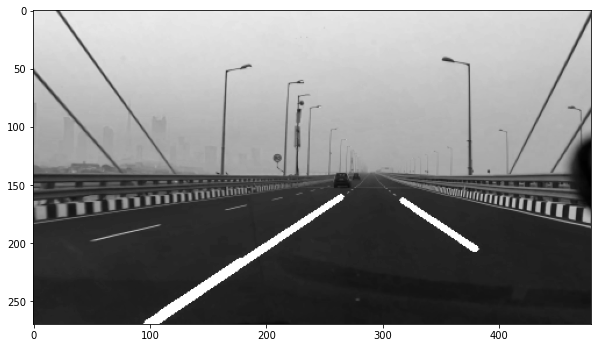

In [12]:
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)

# create a copy of the original frame
dmy = col_images[idx][:,:,0].copy()

# draw Hough lines
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

In [13]:
cnt = 0

for img in tqdm(col_images):
  
  # apply frame mask
  masked = cv2.bitwise_and(img[:,:,0], img[:,:,0], mask=stencil)
  
  # apply image thresholding
  ret, thresh = cv2.threshold(masked, 130, 145, cv2.THRESH_BINARY)

  # apply Hough Line Transformation
  lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
  dmy = img.copy()
  
  # Plot detected lines
  try:
    for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)
  
    cv2.imwrite('/home/swsmenon@ads.iu.edu/Downloads/content/drive/My Drive/Misc/road_detection/detected/'+str(cnt)+'.png',dmy)
  
  except TypeError: 
    cv2.imwrite('/home/swsmenon@ads.iu.edu/Downloads/content/drive/My Drive/Misc/road_detection/detected/'+str(cnt)+'.png',img)

  cnt+= 1

  0%|          | 0/1108 [00:00<?, ?it/s]

In [14]:
# input frames path
pathIn= '/home/swsmenon@ads.iu.edu/Downloads/content/drive/My Drive/Misc/road_detection/detected/'

# output path to save the video
pathOut = 'roads_v2.mp4'

# specify frames per second
fps = 30.0

In [15]:
from os.path import isfile, join

# get file names of the frames

files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key=lambda f: int(re.sub('\D', '', f)))

In [16]:
frame_list = []

for i in tqdm(range(len(files))):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    #height, width, layers = img.shape
    #size = (width,height)
    #img = cv2.imread(filename)
   # print(img.shape)
    #height, width, layers = img.shape
    size = 480, 270
   
    #inserting the frames into an image array
    frame_list.append(img)

  0%|          | 0/1109 [00:00<?, ?it/s]

In [17]:
 
img_array = []
for filename in glob.glob('/home/swsmenon@ads.iu.edu/Downloads/content/drive/My Drive/Misc/road_detection/detected/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project_Autonomous1.avi',cv2.VideoWriter_fourcc(*'DIVX'), 50, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [18]:
cap = cv2.VideoCapture('project_Autonomous1.avi')

# Check if camera opened successfully
if (cap.isOpened()== False):

	print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):

	  # Capture frame-by-frame
	ret, frame = cap.read()

	if ret == True:
	# Display the resulting frame
		cv2.imshow('Frame',frame)
    	# Press Q on keyboard to  exit
		if cv2.waitKey(25) & 0xFF == ord('q'):
			break
	else:
		break
    
	
	# Break the loop


	# When everything done, release the video capture object

cap.release()

	 

	# Closes all the frames

cv2.destroyAllWindows()